In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.distance import geodesic

In [133]:
# get data
data = pd.read_csv('./data/orders_autumn_2020.csv')
data.set_index('TIMESTAMP', inplace=True)

In [131]:
# Original data
def calculate_distance(row):
    usercoord = (row['USER_LAT'], row['USER_LONG'])
    print(usercoord)
    venue_coord = (row['VENUE_LAT'], row['VENUE_LONG'])
    print(venue_coord)
    print(geodesic(user_coord, venue_coord).km)
    return geodesic(user_coord, venue_coord).km

# data[['USER_LAT', 'USER_LONG', 'VENUE_LAT', 'VENUE_LONG']].apply(calculate_distance, axis=1)

In [135]:
# Calculate delivery distance
user_coord = data[['USER_LAT', 'USER_LONG']].values
venue_coord = data[['VENUE_LAT', 'VENUE_LONG']].values
user_venue_dist = [geodesic(user_coord[i], venue_coord[i]).km for i in range(data.shape[0])]

#format the data
data['USER_VENUE_DIST'] = user_venue_dist
data.drop(columns=['USER_LAT', 'USER_LONG', 'VENUE_LAT', 'VENUE_LONG'], inplace=True)
data.rename(columns={'ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES':'EST_ACT_Diff'}, inplace=True)
data.index = pd.to_datetime(data.index)
orig_data_desc = data.describe().T
orig_data_desc
# orig_data_desc.to_csv('docs/assets/tables/orig_data_stats.csv')

,count,mean,std,min,25%,50%,75%,max
EST_ACT_Diff,18706.0,-1.201058,8.979834,-41.000000,-7.000000,-2.000000,5.000000,34.00000
ITEM_COUNT,18706.0,2.688228,1.886455,1.000000,1.000000,2.000000,4.000000,11.00000
ESTIMATED_DELIVERY_MINUTES,18706.0,33.809313,7.340283,10.000000,28.000000,33.000000,38.000000,82.00000
ACTUAL_DELIVERY_MINUTES,18706.0,32.608254,10.018879,6.000000,25.000000,32.000000,40.000000,58.00000
CLOUD_COVERAGE,18429.0,11.996853,23.812605,0.000000,0.000000,0.000000,25.000000,100.00000
TEMPERATURE,18429.0,16.973536,3.411900,6.100000,14.400000,16.700000,18.900000,26.70000
WIND_SPEED,18429.0,3.790991,1.456017,0.077419,2.696190,3.631970,4.692530,9.85730
PRECIPITATION,18706.0,0.332756,1.129234,0.000000,0.000000,0.000000,0.000000,6.31579
USER_VENUE_DIST,18706.0,1.023427,0.592918,0.000000,0.591365,0.911855,1.339092,4.67455


<AxesSubplot:xlabel='EST_ACT_Diff', ylabel='Count'>

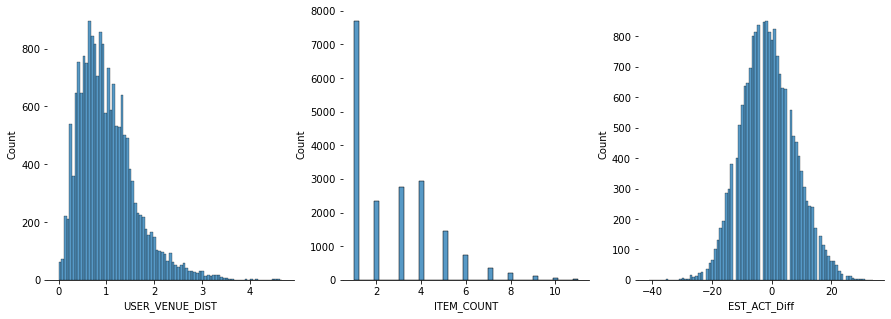

In [153]:
# Distribution of key features
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
sns.histplot(data=data['USER_VENUE_DIST'], ax=ax[0])

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
sns.histplot(data=data['ITEM_COUNT'], ax=ax[1])

ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].spines['left'].set_visible(False)
sns.histplot(data=data['EST_ACT_Diff'], ax=ax[2])

<AxesSubplot:>

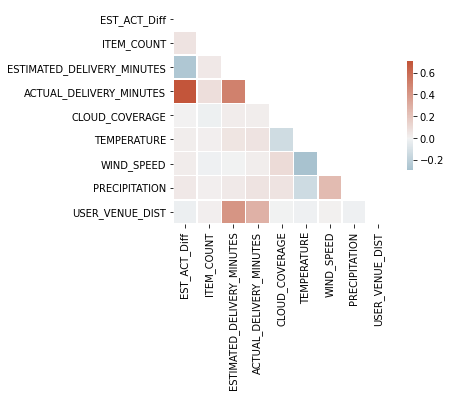

In [136]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidth=0.5, 
                cbar_kws={"shrink":.5})


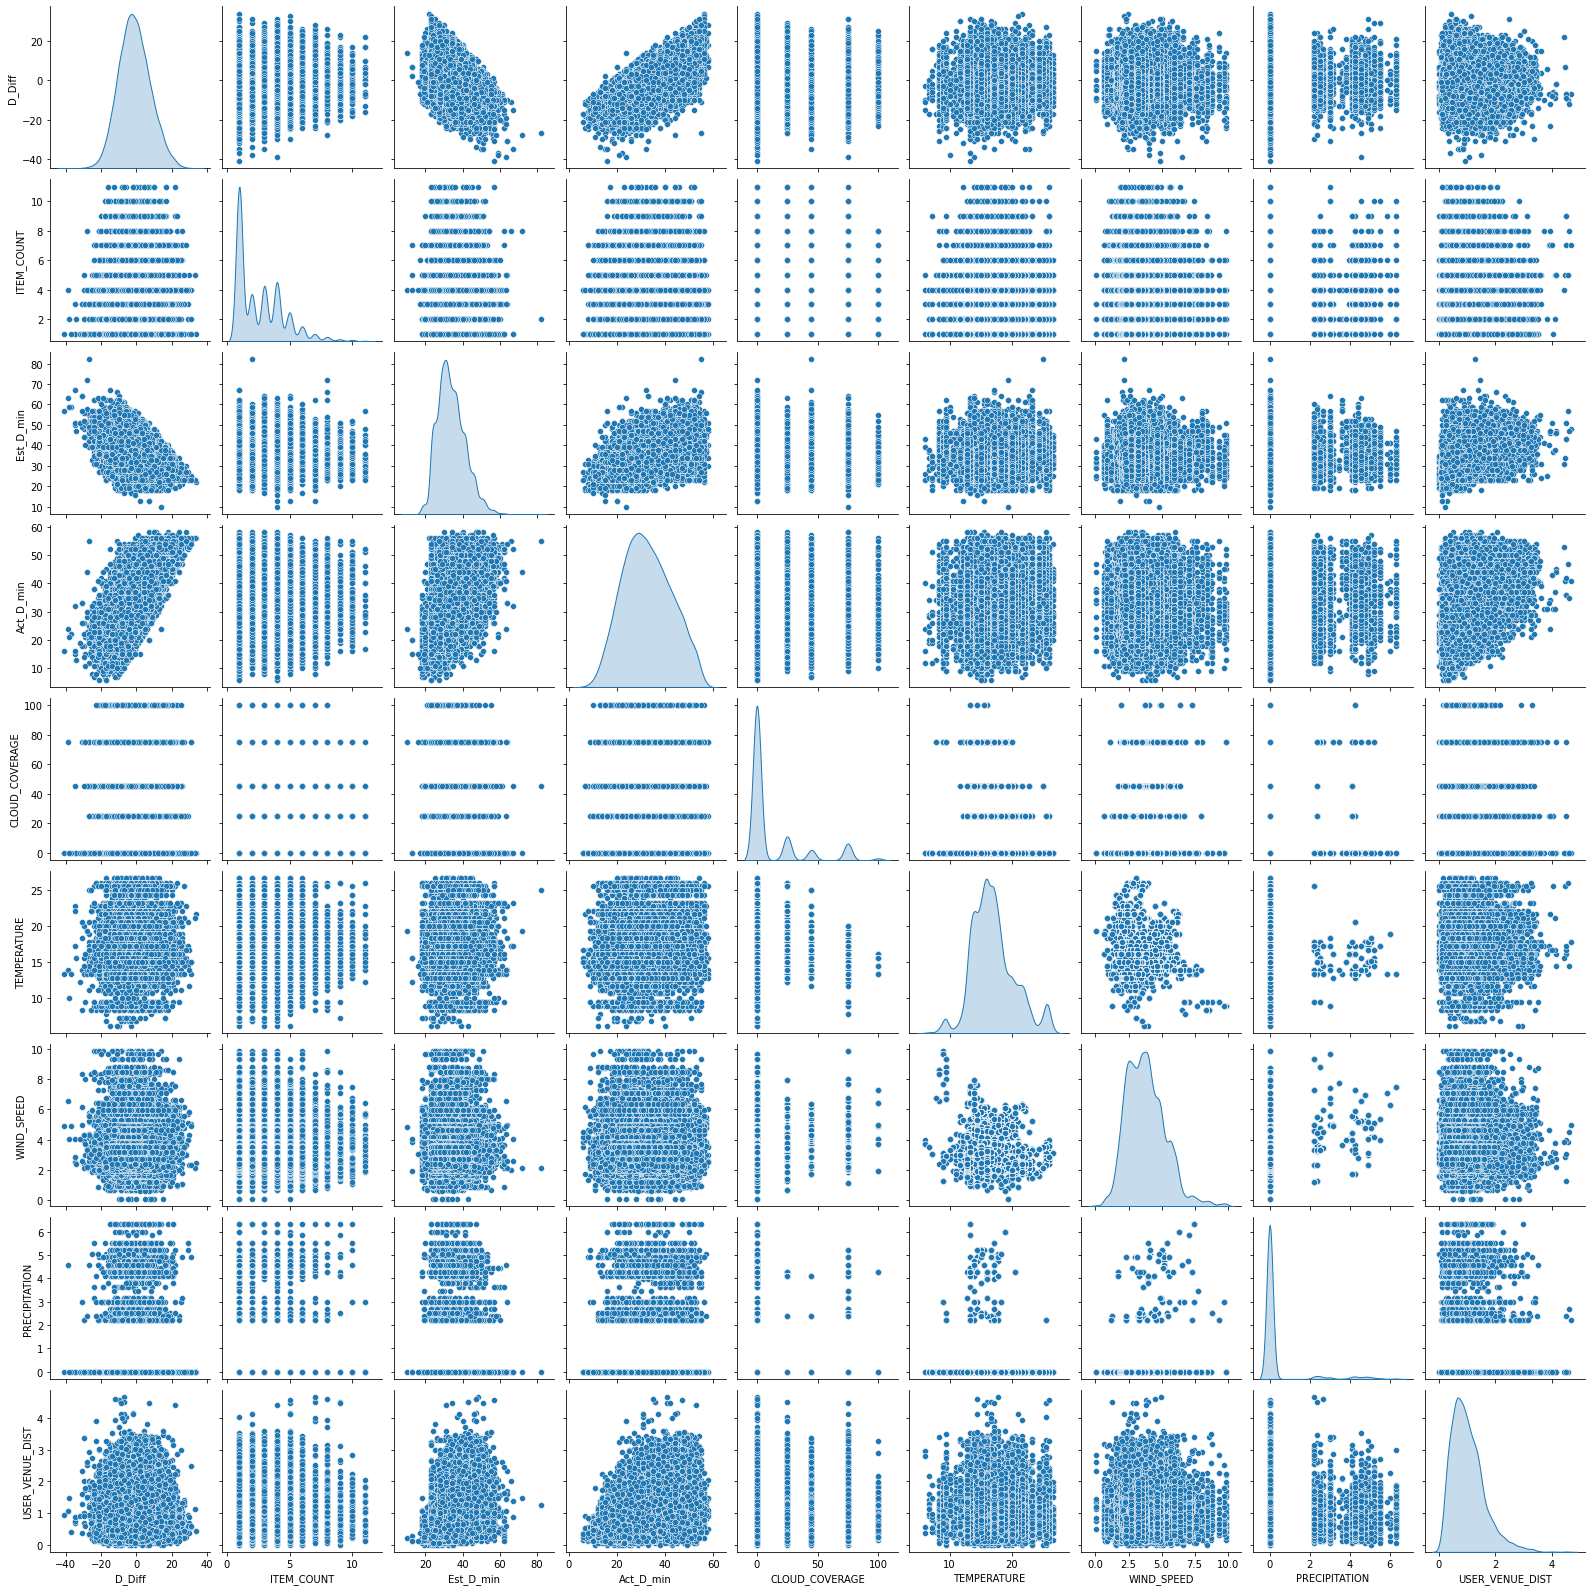

In [103]:
sns.pairplot(data=data, diag_kind='kde')

<AxesSubplot:xlabel='ITEM_COUNT', ylabel='Count'>

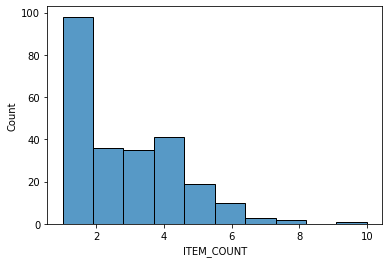

In [51]:
sns.histplot(data=data.loc['08/20/2020']['ITEM_COUNT'])

## Orders Per Hour

<AxesSubplot:xlabel='TIMESTAMP'>

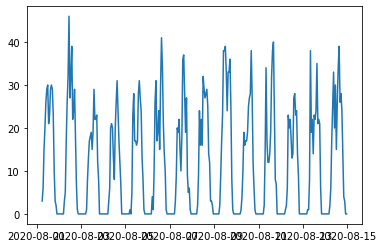

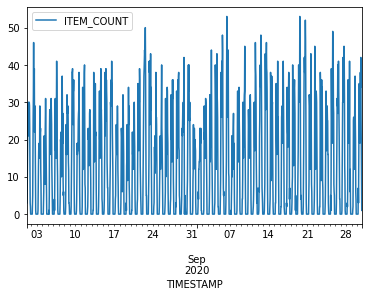

In [194]:
# Hourly data resampling
orders_per_hour = data[['ITEM_COUNT']].resample('H').count()
# d_hourly data[['ITEM_COUNT', 'USER_VENUE_DIST']].resample('H').count()
fig, ax = plt.subplots()
ax.plot(orders_per_hour.loc['08/01/2020': '08/14/2020'])
orders_per_hour.plot()

<AxesSubplot:ylabel='Count'>

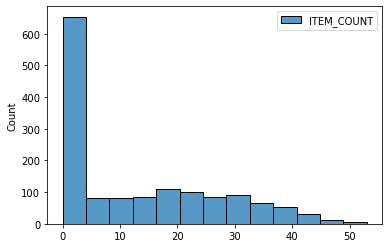

In [177]:
sns.histplot(data=orders_per_hour.dropna())

In [195]:
data[['ITEM_COUNT', 'USER_VENUE_DIST']].tail(30)

,ITEM_COUNT,USER_VENUE_DIST
TIMESTAMP,,
2020-09-30 17:56:00,1,0.248976
2020-09-30 17:57:00,1,0.248477
2020-09-30 18:00:00,6,0.124469
2020-09-30 18:00:00,3,0.497891
2020-09-30 18:01:00,2,1.443221
2020-09-30 18:03:00,4,1.936431
2020-09-30 18:05:00,8,0.475787
2020-09-30 18:06:00,4,0.434451
2020-09-30 18:08:00,6,2.193280


In [183]:
np.histogram(orders_per_hour)

(array([674, 100, 105, 156, 122, 113,  91,  67,  20,   7]),
 array([ 0. ,  5.3, 10.6, 15.9, 21.2, 26.5, 31.8, 37.1, 42.4, 47.7, 53. ]))

In [184]:
np.histogram(orders_per_hour.dropna())

(array([674, 100, 105, 156, 122, 113,  91,  67,  20,   7]),
 array([ 0. ,  5.3, 10.6, 15.9, 21.2, 26.5, 31.8, 37.1, 42.4, 47.7, 53. ]))